# BPT (Baldwin, Phillips & Terlevich) plot with galamo

Welcome to the tutorial on using `galamo`, a Python package designed for comprehensive galaxy analysis.

**Abstract**: In this tutorial, we'll explore the `bpt` module that helps in classifying galaxy types on the basis of initial spectral data of the galaxies. `bpt` works on mathematical formulation given by Kewley and Kauffman.

This module is especially useful for astrophysics researchers and students working with AGNs (Active Galactic Nuclei) host galaxies from surveys like SDSS.

Keywords: `pandas`, `astroquery`, `astropy`, `flux`, `matplotlib`, `bpt`

**Author:** Jashanpreet Singh Dingra

References:
- https://ned.ipac.caltech.edu/level5/Glossary/Essay_bpt.html
- https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract (Kewley et al. (2001))
- https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract (Kauffmann et al. (2003))

Let’s get started!

---

In [1]:
!pip show galamo #check requirements

Name: galamo
Version: 0.0.8
Summary: A Python package for comprehensive galaxy analysis, integrating machine learning and statistical methods. It provides automated tools for morphology classification, kinematics, photometry, and spectral analysis to aid astrophysical research.
Home-page: https://www.galamo.org
Author: Jashanpreet Singh Dingra
Author-email: astrodingra@gmail.com
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages
Requires: joblib, matplotlib, numpy, opencv-python, requests, tensorflow, termcolor
Required-by: 


---
### Imports

In [2]:
from astroquery.sdss import SDSS
from astropy.table import Table
import pandas as pd 
from galamo import bpt

2025-04-30 03:13:01.356967: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-30 03:13:01.356992: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-30 03:13:01.356995: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1745962981.357374 2487173 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1745962981.357638 2487173 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Data Query using `astroquery`

In [3]:
# Define SQL query
query = """
SELECT TOP 1000
    i.specobjid,
    i.plateid,
    i.mjd,
    i.fiberid,
    i.z,
    i.ra,
    i.dec,

    -- Emission Line Fluxes
    l.h_alpha_flux,
    l.h_beta_flux,
    l.oiii_5007_flux,
    l.nii_6584_flux,
    l.oi_6300_flux,
    l.sii_6717_flux,
    l.sii_6731_flux,

    -- Equivalent Widths
    l.h_alpha_eqw,
    l.nii_6584_eqw,

    -- Flux Errors
    l.h_alpha_flux_err,
    l.h_beta_flux_err,
    l.oiii_5007_flux_err,
    l.nii_6584_flux_err,
    l.oi_6300_flux_err,
    l.sii_6717_flux_err,
    l.sii_6731_flux_err

FROM
    galSpecInfo AS i
JOIN
    galSpecLine AS l ON i.specobjid = l.specobjid

WHERE
    i.z BETWEEN 0 AND 0.3
    AND l.h_alpha_flux_err > 0 AND l.h_alpha_flux / l.h_alpha_flux_err > 5
    AND l.h_beta_flux_err > 0 AND l.h_beta_flux / l.h_beta_flux_err > 5
    AND l.oiii_5007_flux_err > 0 AND l.oiii_5007_flux / l.oiii_5007_flux_err > 5
    AND l.nii_6584_flux_err > 0 AND l.nii_6584_flux / l.nii_6584_flux_err > 5
    AND l.sii_6717_flux_err > 0 AND l.sii_6717_flux / l.sii_6717_flux_err > 5
    AND l.sii_6731_flux_err > 0 AND l.sii_6731_flux / l.sii_6731_flux_err > 5
    AND l.oi_6300_flux_err > 0 AND l.oi_6300_flux / l.oi_6300_flux_err > 5
"""

# Run query
result = SDSS.query_sql(query)

# Convert to Astropy Table and optionally save as CSV
if result:
    table = Table(result)
    table.write("AGN_data.csv", format="csv", overwrite=True)
    print("Query successful. Data saved to AGN_data.csv")
else:
    print("No results returned.")

Query successful. Data saved to AGN_data.csv


### Plotting BPT Diagrams

Galamo's `bpt` module provides tools for generating BPT (Baldwin, Phillips & Terlevich) diagnostic diagrams, which are essential for classifying emission-line galaxies based on their ionization mechanisms.

#### Available Map Styles

The module currently supports the following visualization styles:

- **`default`**
- **`bubble`** 
- **`soft`** 

#### Export Options

All BPT diagrams can be exported in a wide range of formats, including:

- **PNG**
- **PDF**
- **SVG**
- **EPS**

This allows for seamless integration into publications, presentations, or reports.


✅ Columns matched


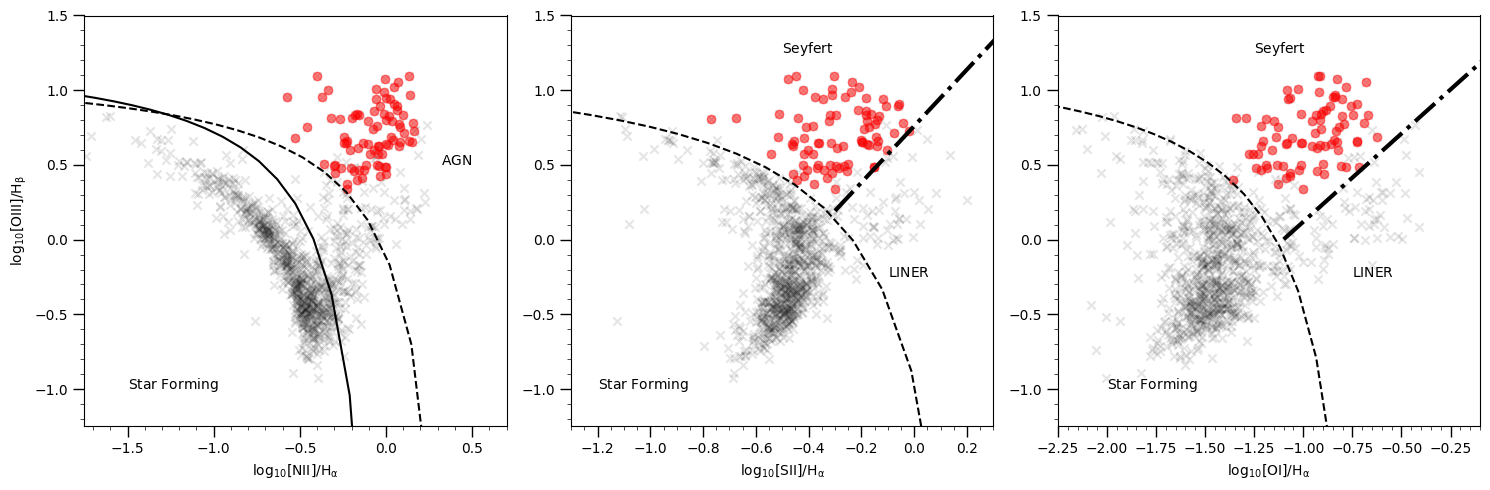

In [4]:
bpt.draw("AGN_data.csv") # default map

#### Applying maps

2) Bubble 

✅ Columns matched


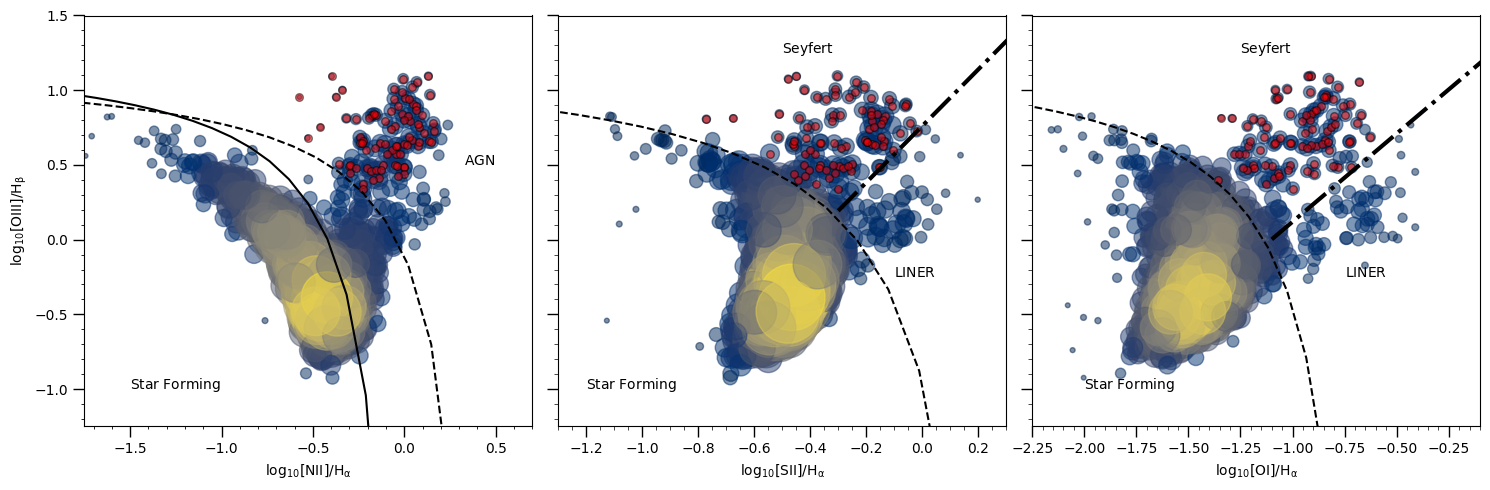

In [5]:
bpt.draw("AGN_data.csv", map="bubble") # bubble map

3) Soft

✅ Columns matched


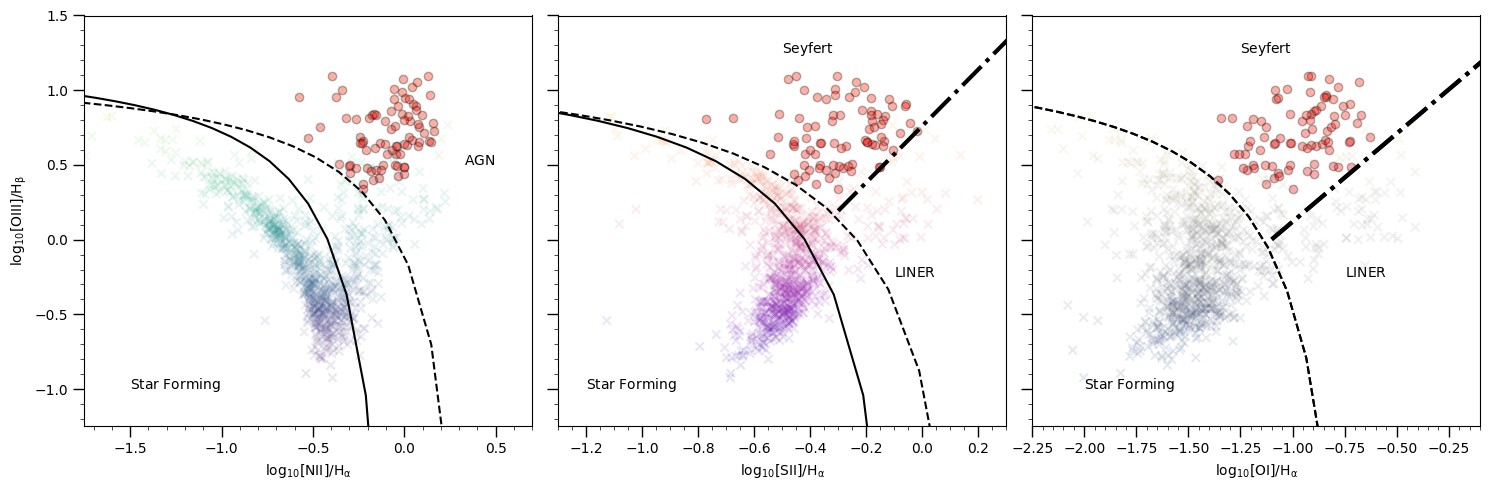

In [6]:
bpt.draw("AGN_data.csv", map="soft") # bubble map

#### Saving the diagram

✅ Columns matched


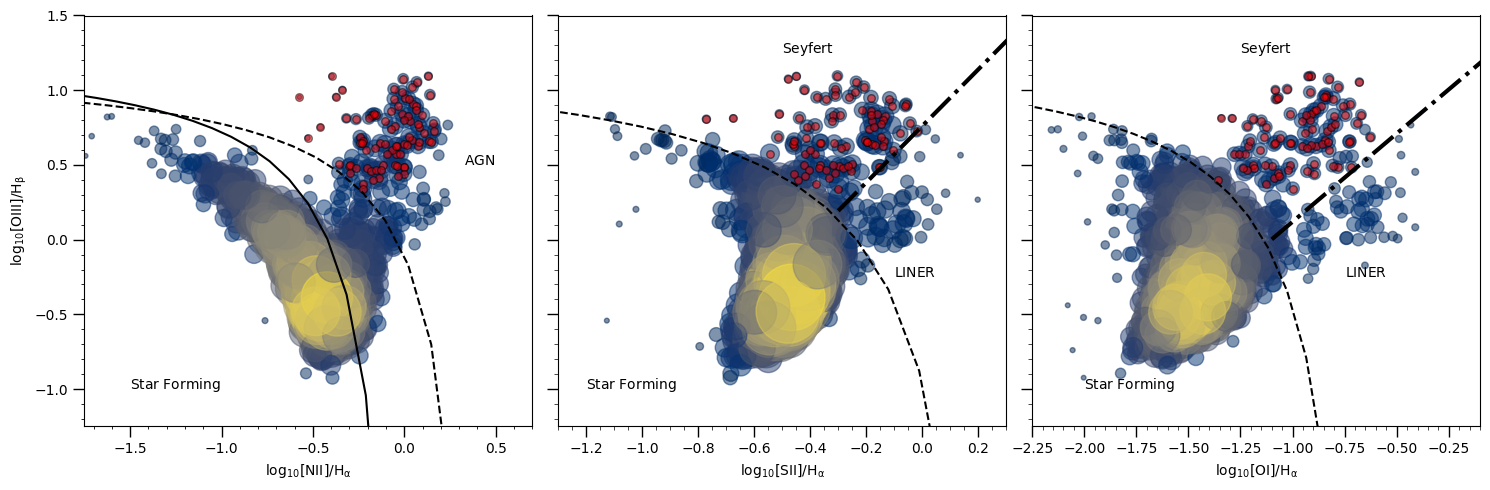

In [7]:
bpt.draw("AGN_data.csv", map="bubble", save_figure=True, output_filename="BPT_diagram.pdf") # bubble map and saved as pdf

---
Exported File: <br>
<img src="saved.png" alt="BPT Diagram" width="500">

---

## Error Detection in data

<p style="color:red;">
If the queried data is missing any critical parameters required for generating the BPT diagram, the module will raise an error and provide a clear message indicating the missing parameter and its expected location in the data structure. This ensures data integrity and helps guide users to correct their input before proceeding with the analysis.
</p>


In [8]:
bpt.draw("wrong.csv")

Missing columns: h_alpha_flux
❌ COLUMN ERROR: Ensure your data contains the required columns.

Columns must look like: ['h_alpha_flux', 'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux', 'oi_6300_flux', 'sii_6717_flux', 'sii_6731_flux']
⚠️ Check SDSS format or documentation @ www.galamo.org


NameError: name 'exit' is not defined

**For any issue in the module raise @ https://github.com/galamo-org/galamo/issues**

In [2]:

from astroquery.sdss import SDSS
from astropy.table import Table

query = """
SELECT TOP 1000
    s.specObjID,
    s.ra, s.dec, s.z,
    
    l.h_alpha_flux,      l.h_alpha_flux_err,
    l.h_beta_flux,       l.h_beta_flux_err,
    l.oiii_5007_flux,    l.oiii_5007_flux_err,
    l.nii_6584_flux,     l.nii_6584_flux_err,
    l.oi_6300_flux,      l.oi_6300_flux_err,
    l.sii_6717_flux,     l.sii_6717_flux_err,
    l.sii_6731_flux,     l.sii_6731_flux_err

FROM SpecObj AS s
JOIN galSpecLine AS l ON s.specObjID = l.specObjID

WHERE
    s.class = 'GALAXY' AND
    l.h_alpha_flux > 0 AND
    l.h_beta_flux > 0 AND
    l.oiii_5007_flux > 0 AND
    l.nii_6584_flux > 0 AND
    l.oi_6300_flux > 0 AND
    l.sii_6717_flux > 0 AND
    l.sii_6731_flux > 0
"""

# Run the query using astroquery
results = SDSS.query_sql(query)

results.write('bpt_data.csv', format='csv', overwrite=True)

print("Saved to bpt_data.csv")

Saved to bpt_data.csv
